# Image Classifcation
Plant disease corn,maize,tomato

In [47]:
#importing Librararies


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

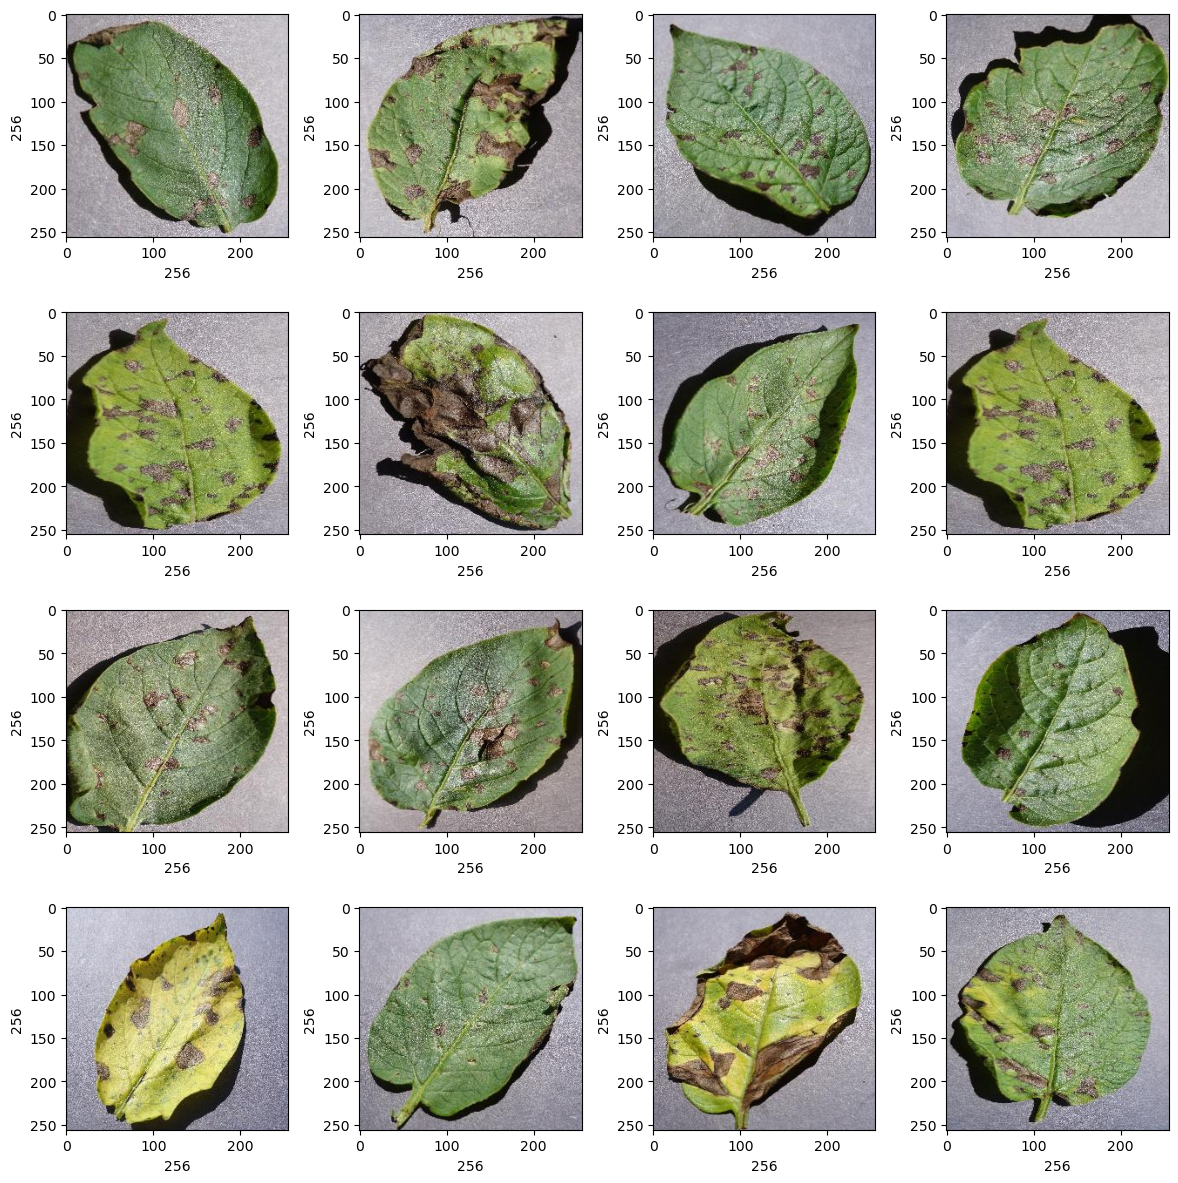

In [49]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "Data/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [50]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    image = cv2.imread(image_dir)
    if image is not None :
        image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        return img_to_array(image)
    else :
        return np.array([])

In [51]:
dir = "Data/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [91]:
image_list[5].shape

(256, 256, 3)

In [52]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [53]:
label_counts.count()

3

In [54]:
image_list[0].shape

(256, 256, 3)

In [55]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [56]:
#splitting

In [57]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [1]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0

NameError: name 'np' is not defined

In [59]:
x_train.shape

(720, 256, 256, 3)

In [60]:
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [61]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [4]:
# Model 1
def create_ann_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (256, 256, 3)
num_classes = len(label_counts)
model = create_ann_model(input_shape, num_classes)
model.summary()


In [98]:
# Training the model
epochs = 15
batch_size = 7
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 362ms/step - accuracy: 0.9507 - loss: 0.1817 - val_accuracy: 0.9167 - val_loss: 1.3180
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 348ms/step - accuracy: 0.9817 - loss: 0.1269 - val_accuracy: 0.9375 - val_loss: 1.2140
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 28s 340ms/step - accuracy: 0.9690 - loss: 0.1209 - val_accuracy: 0.9583 - val_loss: 1.0766
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 310ms/step - accuracy: 0.9300 - loss: 0.3072 - val_accuracy: 0.9028 - val_loss: 1.0191
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.9584 - loss: 0.1796 - val_accuracy: 0.9653 - val_loss: 0.8568
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9709 - loss: 0.0510 - val_accuracy: 0.9097 - val_loss: 1.1097
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 311ms/step - accuracy: 0.9911 - loss: 0.0534 - val_accuracy: 0.9444 - val_loss: 0.9071
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - accuracy: 0.9833 - loss: 0.0533 - val_accu

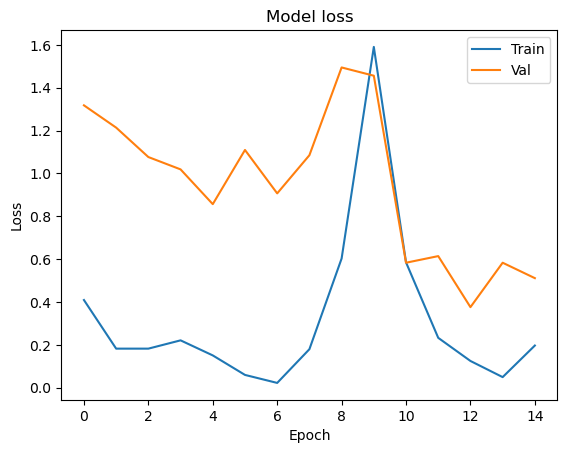

In [99]:
# plot the results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

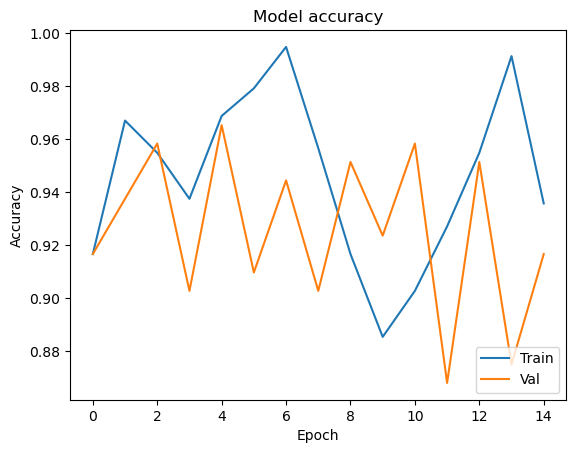

In [100]:
#plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [101]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9335 - loss: 0.1256
Test Accuracy: 0.9111111164093018
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [102]:
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm

array([[65,  0,  0],
       [ 0, 44, 15],
       [ 0,  1, 55]], dtype=int64)

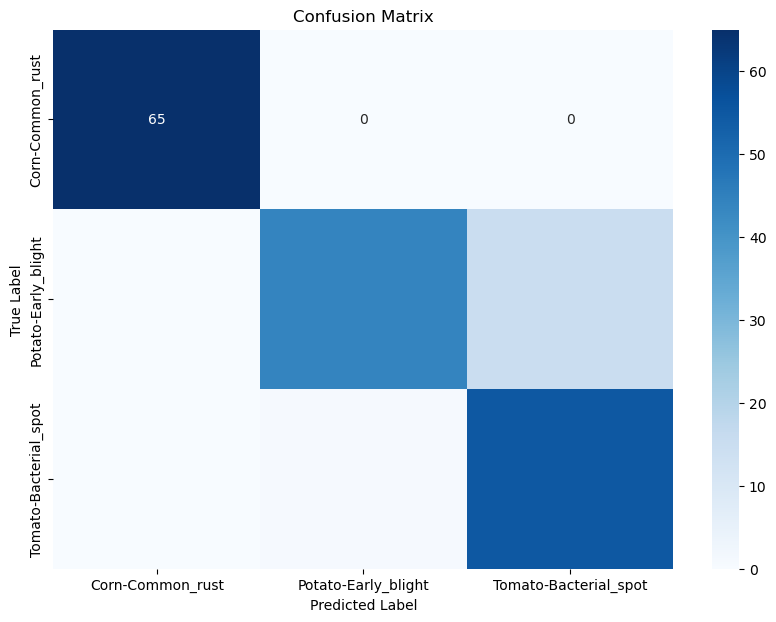

In [103]:
# Visualizing the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [83]:
model.save('ann_model.h5')


In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = load_model('ann_model.h5')

# Function to preprocess and predict on a single image
def preprocess_image(image_path):
    # Load image
    img = load_img(image_path, target_size=(256, 256))  # Resize to match input shape
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array.astype('float32') / 255.0  # Normalize
    img_array = img_array.reshape(1, 256, 256, 3)  # Reshape for the model
    return img_array

def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Predicted class for image1.jpg: 0


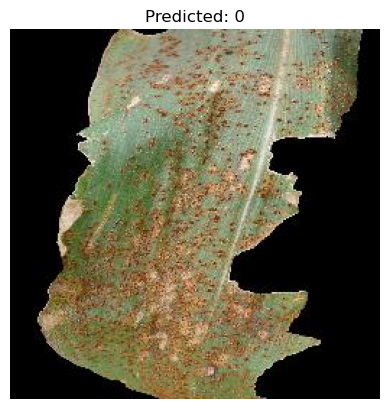

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class for image2.jpg: 2


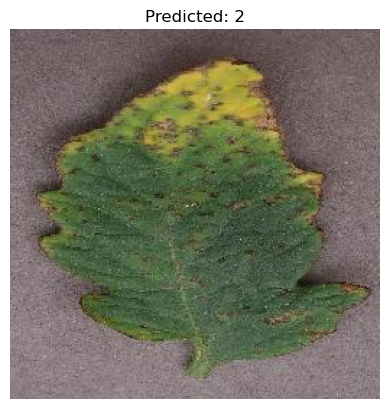

In [3]:
#Example usage with test images
test_image_paths = ['image1.jpg', 'image2.jpg']  # Replace with your test image paths
for img_path in test_image_paths:
    predicted_class = predict_image(img_path)
    print(f"Predicted class for {img_path}: {predicted_class}")

    # Optionally display the image
    img = load_img(img_path, target_size=(256, 256))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()